<a href="https://colab.research.google.com/github/g2246462796/dive_into_deep_learning/blob/main/2_%E9%A2%84%E5%A4%87%E7%9F%A5%E8%AF%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google云盘操作

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


# 2.1数据操作

## 2.1.1 入门

In [ ]:
import torch

arrange创建一维向量,从0到11

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

shape属性访问张量的形状(沿每个轴的元素个数)

In [ ]:
x.shape

torch.Size([12])

numel显示元素个数(即各个维度的乘积)

In [ ]:
x.numel()

12

reshape改变形状但是不改变元素数量和元素值,可以只指定一个维度,另一个维度-1,会自动计算



In [ ]:
X=x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

初始化矩阵,用特定函数来指定张量,如zeros,ones,randn(均值为0,标准差为1的标准高斯分布,即正态分布)

In [ ]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3,4)

tensor([[-0.5102, -0.9889, -0.7005,  2.3983],
        [-0.7397, -1.0218, -0.1483,  0.7696],
        [-1.4915,  0.0194, -2.5886, -0.2799]])

也可以直接给元素赋值来实现

In [ ]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 2.1.2运算符

一些基础运算,加减乘除幂等

In [ ]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

求指数

In [ ]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

改变维度以及按行和列分别连接两个矩阵

In [ ]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

逻辑运算

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

对所有元素求和

In [ ]:
X.sum()

tensor(66.)

## 2.1.3 广播机制

对于形状不相同的张量,存在广播机制:
1.适当复制元素来扩展一个或者两个数组,以便在转换之后,两个张量具有相同的形状;
2.对生成的数组执行按元素操作。
大多数情况,沿着数组中长度为1的轴进行广播

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

形状不匹配,矩阵a将复制列,矩阵b将复制行,然后按元素相加

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 2.1.4 索引和切片

和数组一样,张量中的元素可以通过索引来访问

In [ ]:
X[-1],X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

指定索引来将元素写入矩阵

In [ ]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

赋值多个元素

In [ ]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## 2.1.5 节省内存

运行一些操作可能会导致为新结果分配内存,我们将取消引用张量,二十指向新分配的内存处的张量

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

为避免分配不必要的内存,我们使用切片表示法,将操作的结果分配给先前分配的数组

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X + Y
print('id(Z)',id(Z))

id(Z): 134424476005088
id(Z) 134424476005088


如果后续计算没有重复使用X,也可以切片法或+=来减少内存开销

In [ ]:
before = id(X)
X += Y
id(X) == before

True

## 2.1.6 转换为其他python对象

张量转化很容易，共享底层内存，就地操作更改一个，另一个也会同时改变

In [ ]:
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

将张量转化为标量，可以调用item函数或Python内置函数

In [ ]:
a = torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.1.7 小结

深度学习存储和操作数据的主要接口是张量（n维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转化为其他python对象

## 2.1.8 练习

1.运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

2.用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

这里只写一下2

In [ ]:
a = torch.arange(3).reshape((3,1))
c = torch.arange(9).reshape((3,3))
a,c,a+c

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[ 0,  1,  2],
         [ 4,  5,  6],
         [ 8,  9, 10]]))

# 2.2数据预处理

现实世界的数据并不是拿来直接用的,而是要经过预处理，通常用pandas软件包来进行数据预处理。

## 2.2.1 读取数据集

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

要从创建的CSV文件中加载原始数据集，我们导入pandas包并调用read_csv函数。该数据集有四行三列。其中每行描述了房间数量（“NumRooms”）、巷子类型（“Alley”）和房屋价格（“Price”）。

In [ ]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)
data

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


## 2.2.2 处理缺失值

注意，“NaN”项代表缺失值。 为了处理缺失的数据，典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。


通过位置索引iloc，我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。 对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。

In [ ]:
inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


## 2.2.3 转换为张量格式

现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式。 当数据采用张量格式后，可以通过在 2.1节中引入的那些张量函数来进一步操作。

In [ ]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.2.4 小结

pandas软件包是Python中常用的数据分析工具,可以与张量兼容

用pandas处理缺失数据时,根据情况选择插值法和删除法

## 2.2.5 练习

创建包含更多行和列的原始数据集。

删除缺失值最多的列。

将预处理后的数据集转换为张量格式。

# 2.3线性代数

回顾一些基本线性代数内容，并用代码来实现这些计算

## 2.3.1标量

数学表示法：小写字母表示标量变量，R表示所有实数标量的空间

In [ ]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## 2.3.2 向量

向量可以被视为标量组成的列表，标量值被称为向量的元素或分量。通过一维张量表示向量

In [ ]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

通过下标访问,默认列向量是向量的默认方向

In [ ]:
x[3]

tensor(3)

### 2.3.2.1 长度、维度和形状

向量只是一个数字数字，向量的长度通常称为向量的维度。
可以使用len函数来访问张量的长度

In [ ]:
len(x)

4

因为只有一个轴，我们也可以通过.shape属性访问向量的长度

In [ ]:
x.shape

torch.Size([4])

请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

## 2.3.3 矩阵

向量将标量从零阶推广到一阶,矩阵将向量从一阶推广到二阶。
用函数来实例化张量时，我们可以通过指定两个分量m和n来创建一个形状为m * n的矩阵

In [ ]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

转置

In [ ]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

对称矩阵A等于其转置，这里定义一个对称矩阵B

In [ ]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

与他的转置相比较

In [ ]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

矩阵是有用的数据结构：它们允许我们组织具有不同模式的数据。 例如，我们矩阵中的行可能对应于不同的房屋（数据样本），而列可能对应于不同的属性。 曾经使用过电子表格软件或已阅读过 2.2节的人，应该对此很熟悉。 因此，尽管单个向量的默认方向是列向量，但在表示表格数据集的矩阵中， 将每个数据样本作为矩阵中的行向量更为常见。 后面的章节将讲到这点，这种约定将支持常见的深度学习实践。 例如，沿着张量的最外轴，我们可以访问或遍历小批量的数据样本。

## 2.3.4 张量

就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构。 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的n维数组的通用方法。 例如，向量是一阶张量，矩阵是二阶张量。

In [ ]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## 2.3.5 张量算法的基本性质

标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [ ]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

矩阵的积

In [ ]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [ ]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## 2.3.6 降维

我们可以对任意张量进行的一个有用的操作是计算其元素的和。

In [ ]:
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

我们可以表示任意形状张量的元素和。

In [ ]:
A.shape,A.sum()

(torch.Size([5, 4]), tensor(190.))

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [ ]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0,A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

指定axis=1将通过汇总所有列的元素降维（轴1）。因此，输入轴1的维数在输出形状中消失。

In [ ]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和。

In [ ]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

一个与求和相关的量是平均值（mean或average）。 我们通过将总和除以元素总数来计算平均值。 在代码中，我们可以调用函数来计算任意形状张量的平均值。

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

A.mean(), A.sum() / A.numel()

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 2.3.6.1 非降维求和

但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

例如，由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。

In [ ]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

如果我们想沿某个轴计算A元素的累积总和， 比如axis=0（按行计算），可以调用cumsum函数。 此函数不会沿任何轴降低输入张量的维度。

In [ ]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

## 2.3.7 点积

In [ ]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

注意，我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [ ]:
torch.sum(x * y)

tensor(6.)

点积在很多场合都很有用。例如向量和权重点积来获得加权平均

## 2.3.8 矩阵-向量积

在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [ ]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

## 2.3.9 矩阵-矩阵乘法

In [ ]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

## 2.3.10 范数

线性代数中最有用的一些运算符是范数（norm）。 非正式地说，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
在线性代数中，向量范数是将向量映射到标量的函数f。
三条性质:
1.缩放所有元素，范数也会按常数因子的绝对值缩放
2.三角不等式
3.范数非负
范数听起来很像距离的度量。

计算L2范数

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

计算L1范数(向量元素的绝对值之和)

In [ ]:
torch.abs(u).sum()

tensor(7.)

Frobenius范数,L1和L2都是此范数的特例

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

### 2.3.10.1 范数和目标

在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

## 2.3.11 关于线性代数的更多信息

在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

## 2.3.12 小结

标量、向量、矩阵和张量是线性代数中的基本数学对象。

向量泛化自标量，矩阵泛化自向量。

标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

一个张量可以通过sum和mean沿指定的轴降低维度。

两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

在深度学习中，我们经常使用范数，如L1范数、L2范数和Frobenius范数。

我们可以对标量、向量、矩阵和张量执行各种操作。

## 2.3.13 练习

# 2.4 微积分

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。

因此，我们可以将拟合模型的任务分解为两个关键问题：

优化（optimization）：用模型拟合观测数据的过程；

泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

## 2.4.1 导数和微分

In [ ]:
!pip install d2l==0.14
%matplotlib inline
from matplotlib_inline import backend_inline
import numpy as np
from d2l import torch as d2l
def f(x):
  return 3 * x**2 - 4 * x
def numerical_lim(f,x,h):
  return (f(x+h)-f(x))/h
h = 0.1
for i in range(5):
  print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
  h *= 0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00
h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


为了对导数的这种解释进行可视化，我们将使用matplotlib， 这是一个Python中流行的绘图库。 要配置matplotlib生成图形的属性，我们需要定义几个函数。 在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

注意，注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）。

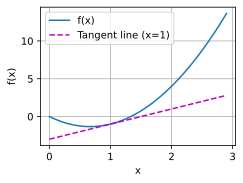

In [ ]:
x = np.arange(0,3,0.1)
d2l.plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

## 2.4.2 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。 在深度学习中，函数通常依赖于许多变量。 因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

## 2.4.3 梯度

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。

## 2.4.4 链式法则

然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。

## 2.4.5 小结

微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

链式法则可以用来微分复合函数。

# 2.5 自动微分

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

## 2.5.1 一个简单的例子

作为一个演示例子，假设我们想对函数y=2xTx
关于列向量x
求导。 首先，我们创建变量x并为其分配一个初始值。

In [ ]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算y
关于x
的梯度之前，需要一个地方来存储梯度。 重要的是，我们不会在每次对一个参数求导时都分配新的内存。 因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。 注意，一个标量函数关于向量x
的梯度是向量，并且与x
具有相同的形状。

In [ ]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

tensor([0., 0., 0., 0.])

计算y

In [ ]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

快速验证这个梯度是否计算正确。

In [ ]:
x.grad == 4 * x

tensor([ True, False, False, False])

现在计算x的另一个函数

In [ ]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 2.5.2 非标量变量的反向传播

当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [ ]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 2.5.3 分离计算

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## 2.5.4 Python控制流的梯度计算

使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

In [ ]:
a.grad == d / a

tensor(True)

## 2.5.5 小结

深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

# 2.6 概率

简单地说，机器学习就是做出预测。
 因此，概率是一种灵活的语言，用于说明我们的确定程度，并且它可以有效地应用于广泛的领域中。

## 2.6.1 基本概率论

对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！

In [ ]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引i
处的值是采样结果中
i出现的次数。

In [ ]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [ ]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 4., 1., 1., 1., 2.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [ ]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1730, 0.1640, 0.1670, 0.1610, 0.1720, 0.1630])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率六分之一所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本

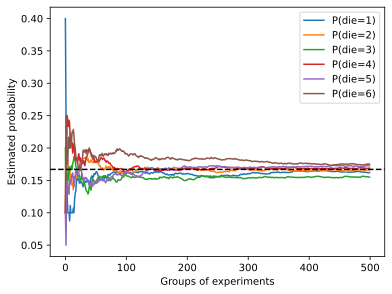

In [ ]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### 2.6.1.1 概率论公理

在处理骰子掷出时，我们将集合S成为样本空间，其中每个元素都是结果。

事件（event）是一组给定样本空间的随机结果。

概率（probability）可以被认为是将集合映射到真实值的函数。

以上也是概率论的公理，由科尔莫戈罗夫于1933年提出。 有了这个公理系统，我们可以避免任何关于随机性的哲学争论； 相反，我们可以用数学语言严格地推理。

### 2.6.1.2 随机变量

在我们掷骰子的随机实验中，我们引入了随机变量（random variable）的概念。 随机变量几乎可以是任何数量，并且它可以在随机实验的一组可能性中取一个值。

请注意，离散（discrete）随机变量（如骰子的每一面） 和连续（continuous）随机变量（如人的体重和身高）之间存在微妙的区别。实生活中，测量两个人是否具有完全相同的身高没有太大意义。 如果我们进行足够精确的测量，最终会发现这个星球上没有两个人具有完全相同的身高。 在这种情况下，询问某人的身高是否落入给定的区间，比如是否在1.79米和1.81米之间更有意义。 在这些情况下，我们将这个看到某个数值的可能性量化为密度（density）。

## 2.6.2 处理多个随机变量

很多时候，我们会考虑多个随机变量。 我们需要估计这些概率以及概率之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

### 2.6.2.1 联合概率

第一个被称为联合概率（joint probability）

### 2.6.2.2 条件概率

### 2.6.2.3 贝叶斯定理

### 2.6.2.4 边际化(边缘概率)

### 2.6.2.5 独立性

## 2.6.3 期望和方差

为了概括概率分布的关键特征，我们需要一些测量方法。后续略

## 2.6.4 小结


我们可以从概率分布中采样。

我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

# 2.7 查阅文档

我们可以从概率分布中采样。

我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

## 2.7.1 查找模块中的所有函数和类

我们可以从概率分布中采样。

我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

In [ ]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

通常可以忽略以“__”（双下划线）开始和结束的函数，它们是Python中的特殊对象， 或以单个“_”（单下划线）开始的函数，它们通常是内部函数。 根据剩余的函数名或属性名，我们可能会猜测这个模块提供了各种生成随机数的方法， 包括从均匀分布（uniform）、正态分布（normal）和多项分布（multinomial）中采样。

## 2.7.2 查找特定函数和类的用法

有关如何使用给定函数或类的更具体说明，可以调用help函数。 例如，我们来查看张量ones函数的用法。

In [ ]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

从文档中，我们可以看到ones函数创建一个具有指定形状的新张量，并将所有元素值设置为1。 下面来运行一个快速测试来确认这一解释：

In [ ]:
torch.ones(4)

tensor([1., 1., 1., 1.])

在Jupyter记事本中，我们可以使用?指令在另一个浏览器窗口中显示文档。 例如，list?指令将创建与help(list)指令几乎相同的内容，并在新的浏览器窗口中显示它。 此外，如果我们使用两个问号，如list??，将显示实现该函数的Python代码。

In [ ]:
list??

## 2.7.3 小结

官方文档提供了本书之外的大量描述和示例。

可以通过调用dir和help函数或在Jupyter记事本中使用?和??查看API的用法文档。